In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [53]:
sns.set(style="whitegrid", palette="pastel", font_scale=1)
plt.rcParams["figure.figsize"] = (10,6)

In [55]:
pd.set_option('display.max_columns', None)

In [57]:
bank = pd.read_excel("Bank_updated.xlsx")

In [58]:
df = bank.copy()

In [59]:
df.columns

Index(['Client_ID', 'Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Purpose', 'Credit_amount', 'Savings_account_bonds',
       'Present_employment_since', 'Installment_rate_percent_income', 'gender',
       'marital status', 'Other_debtors_guarantors', 'Present_residence_since',
       'Property', 'Age_in_years', 'Other_installment_plans', 'Housing',
       'Number_of_existing_credits_at_this_bank', 'Job Category',
       'Income Level', 'Annual Income (PKR)',
       'Number_of_people_liable_for_maintenance', 'Credit_Risk'],
      dtype='object')

In [63]:
df.head()

,Client_ID,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_percent_income,gender,marital status,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job Category,Income Level,Annual Income (PKR),Number_of_people_liable_for_maintenance,Credit_Risk
0,C00001,"50,000 – 499,999",9,no credits taken/ all credits paid back duly,Housing Loan,2587000,"< 10,000",1 <= ... < 4 years,3,Male,single,none,2,Property Mortgage,27,bank,rent,4,Skilled worker,Low Income,763673,1,GOOD
1,C00002,"5,000 – 49,999",53,critical account/other credits existing (not a...,Credit Card,5344000,"≥ 1,000,000",unemployed,2,Female,Divorced,guarantor,4,Property Mortgage,45,none,own,4,Skilled worker,High Income,8367245,1,GOOD
2,C00003,"< 5,000",7,no credits taken/ all credits paid back duly,Personal Loan,14847000,"≥ 1,000,000",unemployed,2,Female,Separated,co-applicant,3,financial collateral,20,bank,rent,3,Salaried individuals,High Income,6060105,2,GOOD
3,C00004,"50,000 – 499,999",25,no credits taken/ all credits paid back duly,Credit Card,3782000,"100,000 – 999,999",1 <= ... < 4 years,3,Female,Separated,guarantor,3,financial collateral,18,none,rent,3,Skilled worker,High Income,7857096,2,BAD
4,C00005,"< 5,000",50,delay in paying off in the past,Credit Card,15813000,"< 10,000",>= 7 years,3,Male,Married,guarantor,2,financial collateral,46,none,for free,4,Skilled worker,High Income,6751079,1,GOOD


In [11]:
# df.drop(columns=["Client_ID"], inplace=True)

# One Hot Encoding

# Applying Lable Encoding

In [18]:
label_cols = [
    "Purpose",
    "marital status",
    "gender",
    "Property",
    "Other_installment_plans",
    "Housing"
]
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders = le

# Applying Ordinal Encoding

In [103]:
Status_of_existing_checking_account_order = [
    "< 5,000",
    "5,000 – 49,999",
    "50,000 – 499,999",
    "≥ 500,000"
  ]

Credit_history_order = [
    "no credits taken/ all credits paid back duly",
    "all credits at this bank paid back duly",
    "existing credits paid back duly till now",
    "delay in paying off in the past",
    "critical account/other credits existing (not at this bank)"
]

Savings_account_bonds_order = [
    "< 10,000",
    "10,000 – 99,999",
    "100,000 – 999,999",
    "≥ 1,000,000",
    "no saving account"   
]
Present_employment_since_order = [
    "unemployed",
    "< 1 year",
    "1 <= ... < 4 years",
    "4 <= ... < 7 years",
    ">= 7 years"
]

Other_debtors_guarantors_order = [
    "none",
    "co-applicant",
    "guarantor"    
]

Job_Category_order =[
    "Others (daily wagers/unemployed)",
    "Salaried individuals",
    "Skilled worker",
    "Business persons"
]

Income_Level_order = [
    "Low Income",
    "High Income"
]

In [105]:
ordinal_cols = {
    "Status_of_existing_checking_account" : Status_of_existing_checking_account_order,
    "Credit_history" : Credit_history_order,
    "Savings_account_bonds" : Savings_account_bonds_order,
    "Present_employment_since" : Present_employment_since_order,
    "Other_debtors_guarantors" : Other_debtors_guarantors_order,
    "Job Category" : Job_Category_order,
    "Income Level" : Income_Level_order
}

In [71]:
ordinal_cols.values()

dict_values([['< 5,000', '5,000 – 49,999', '50,000 – 499,999', '≥ 500,000'], ['no credits taken/ all credits paid back duly', 'all credits at this bank paid back duly', 'existing credits paid back duly till now', 'delay in paying off in the past', 'critical account/other credits existing (not at this bank)'], ['< 10,000', '10,000 – 99,999', '100,000 – 999,999', '≥ 1,000,000', 'no saving account'], ['unemployed', '< 1 year', '1 <= ... < 4 years', '4 <= ... < 7 years', '>= 7 years'], ['none', 'co-applicant', 'guarantor'], ['Others (daily wagers/unemployed)', 'Salaried individuals', 'Skilled worker', 'Business persons'], ['Low Income', 'High Income'], ['GOOD', 'BAD']])

In [25]:
ordinal_encoders = {}
for col, order in ordinal_cols.items():
    oe = OrdinalEncoder(categories=[order])
    df[col] = oe.fit_transform(df[[col]].astype(str))
    ordinal_encoders[col] = oe

In [232]:
cat_cols = [
    "Purpose",
    "marital status",
    "gender",
    "Property",
    "Other_installment_plans",
    "Housing"
]

In [159]:
df = bank.copy()

In [161]:
df.head(1)

,Client_ID,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_percent_income,gender,marital status,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job Category,Income Level,Annual Income (PKR),Number_of_people_liable_for_maintenance,Credit_Risk
0,C00001,"50,000 – 499,999",9,no credits taken/ all credits paid back duly,Housing Loan,2587000,"< 10,000",1 <= ... < 4 years,3,Male,single,none,2,Property Mortgage,27,bank,rent,4,Skilled worker,Low Income,763673,1,GOOD


In [163]:
df.shape

(10000, 23)

In [201]:
X = df.iloc[:,1:22]
y = df.iloc[:,-1]

In [203]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Column Transformer

In [208]:
from sklearn.compose import ColumnTransformer

In [234]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(sparse_output=False, drop="first"), cat_cols),
    ("tnf2", OrdinalEncoder(categories=list(ordinal_cols.values())), list(ordinal_cols.keys()))
    ], remainder="passthrough")

In [242]:
transformer.fit_transform(X_train).shape

(8000, 29)

In [258]:
transformer.transform(X_test)

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        7.8554200e+05, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        3.7596000e+04, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        7.9891860e+06, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 2.0000000e+00,
        6.2174140e+06, 2.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.5114186e+07, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0000000e+00,
        1.3916658e+07, 2.0000000e+00]])

In [252]:
le = LabelEncoder()
le.fit_transform(y_train)

array([1, 0, 0, ..., 1, 1, 0])

In [260]:
le.transform(y_test)

array([0, 1, 0, ..., 0, 0, 1])

# Feature Engineering - Feture Scalling

# Pipe Line Transformer

# Power Transformer

In [27]:
df.sample(15)

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_percent_income,gender,marital status,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job Category,Income Level,Annual Income (PKR),Number_of_people_liable_for_maintenance,Credit_Risk
1857,3.0,32,0.0,0,18943000,0.0,2.0,2,0,0,1.0,4,0,41,0,1,1,2.0,0.0,758488,1,0.0
1192,2.0,26,3.0,0,16781000,1.0,4.0,3,0,0,1.0,2,3,45,2,2,2,0.0,0.0,40365,2,1.0
907,0.0,4,3.0,1,12357000,1.0,3.0,1,1,3,1.0,2,0,60,1,1,2,2.0,1.0,7383069,1,0.0
1256,2.0,25,3.0,2,5311000,3.0,4.0,2,1,3,1.0,3,2,28,1,1,1,2.0,0.0,785157,1,0.0
9020,3.0,17,1.0,3,1826000,4.0,4.0,4,0,2,1.0,3,1,48,2,1,3,1.0,1.0,6054107,1,0.0
4089,3.0,66,3.0,1,2625000,1.0,3.0,4,1,3,2.0,2,3,30,2,1,4,3.0,1.0,13266473,1,1.0
3974,2.0,58,3.0,2,14571000,2.0,4.0,2,1,1,0.0,1,3,33,0,2,4,2.0,1.0,8339258,1,1.0
9098,1.0,5,3.0,3,17386000,2.0,3.0,1,0,2,0.0,4,1,51,1,2,2,3.0,1.0,13723513,1,0.0
2676,2.0,51,1.0,2,10825000,3.0,1.0,2,0,0,0.0,2,2,55,1,1,1,2.0,1.0,8196225,2,0.0
2476,0.0,26,4.0,1,17741000,3.0,0.0,2,1,3,0.0,2,3,60,0,2,4,3.0,1.0,15328174,1,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Status_of_existing_checking_account      10000 non-null  float64
 1   Duration_in_month                        10000 non-null  int64  
 2   Credit_history                           10000 non-null  float64
 3   Purpose                                  10000 non-null  int32  
 4   Credit_amount                            10000 non-null  int64  
 5   Savings_account_bonds                    10000 non-null  float64
 6   Present_employment_since                 10000 non-null  float64
 7   Installment_rate_percent_income          10000 non-null  int64  
 8   gender                                   10000 non-null  int32  
 9   marital status                           10000 non-null  int32  
 10  Other_debtors_guarantors                 10000 

In [31]:
df.describe(include=[np.number])

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_percent_income,gender,marital status,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job Category,Income Level,Annual Income (PKR),Number_of_people_liable_for_maintenance,Credit_Risk
count,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,1.503800,38.114300,2.018500,1.50000,1.017048e+07,2.003100,1.999200,2.505500,0.520200,1.569800,0.995900,2.498400,1.506800,46.779900,0.991900,0.99190,2.506500,1.600000,0.600000,5.844892e+06,1.495300,0.497900
std,1.114051,19.942758,1.421183,1.11809,5.655361e+06,1.418694,1.410602,1.118524,0.499617,1.098749,0.820457,1.124599,1.116995,16.682173,0.815905,0.81664,1.115743,1.019855,0.489922,5.236164e+06,0.500003,0.500021
min,0.000000,4.000000,0.000000,0.00000,2.500000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,2.945600e+04,1.000000,0.000000
25%,1.000000,21.000000,1.000000,0.75000,5.322500e+06,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,32.000000,0.000000,0.00000,2.000000,1.000000,0.000000,7.742022e+05,1.000000,0.000000
50%,2.000000,38.000000,2.000000,1.50000,1.021750e+07,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,47.000000,1.000000,1.00000,3.000000,2.000000,1.000000,6.103417e+06,1.000000,0.000000
75%,2.000000,56.000000,3.000000,2.25000,1.501625e+07,3.000000,3.000000,4.000000,1.000000,3.000000,2.000000,4.000000,3.000000,61.000000,2.000000,2.00000,4.000000,2.000000,1.000000,8.158132e+06,2.000000,1.000000
max,3.000000,72.000000,4.000000,3.00000,2.000000e+07,4.000000,4.000000,4.000000,1.000000,3.000000,2.000000,4.000000,3.000000,75.000000,2.000000,2.00000,4.000000,3.000000,1.000000,1.649816e+07,2.000000,1.000000


# Correlation Matrix

In [34]:
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()
corr

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_percent_income,gender,marital status,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job Category,Income Level,Annual Income (PKR),Number_of_people_liable_for_maintenance,Credit_Risk
Status_of_existing_checking_account,1.000000,-0.010479,-0.010309,0.023926,0.006225,0.008503,0.006430,-0.002304,0.010823,0.001336,-0.003648,0.010302,0.008900,-0.004930,0.008671,0.002177,0.004204,-0.005528,0.008649,-0.003072,-0.001674,-0.000794
Duration_in_month,-0.010479,1.000000,-0.013865,0.022836,-0.009667,0.005028,-0.009418,0.006901,-0.002044,-0.009125,-0.011120,-0.020935,-0.003912,0.008080,-0.001805,0.006671,0.011529,0.026529,0.016605,0.013886,-0.009309,0.002968
Credit_history,-0.010309,-0.013865,1.000000,0.000598,-0.000717,-0.004592,-0.006478,-0.018026,0.011798,-0.000411,-0.003452,-0.007897,0.013056,0.008819,-0.010566,-0.005731,0.007272,0.010488,-0.000431,0.007188,0.002585,-0.006771
Purpose,0.023926,0.022836,0.000598,1.000000,-0.006942,0.012137,-0.001966,0.000920,0.015934,0.013025,0.011284,-0.008988,0.004885,0.015423,-0.008277,0.019223,0.016475,0.263117,0.547723,0.311362,0.003846,-0.003488
Credit_amount,0.006225,-0.009667,-0.000717,-0.006942,1.000000,-0.008453,0.000315,-0.019758,0.013473,0.002936,0.010835,-0.008734,-0.021756,-0.005201,0.018154,0.008631,-0.010677,-0.013287,-0.013828,-0.017133,-0.005666,-0.005121
Savings_account_bonds,0.008503,0.005028,-0.004592,0.012137,-0.008453,1.000000,0.007048,-0.007605,0.001252,-0.005689,0.001901,0.019529,-0.024090,0.002708,0.008316,-0.018020,0.008548,-0.004051,0.003655,0.000285,-0.006817,0.011922
Present_employment_since,0.006430,-0.009418,-0.006478,-0.001966,0.000315,0.007048,1.000000,-0.004624,0.016200,0.022620,0.000256,0.002395,-0.026972,0.001731,-0.009043,0.011715,-0.013214,0.016045,0.015600,0.021231,-0.005394,0.001274
Installment_rate_percent_income,-0.002304,0.006901,-0.018026,0.000920,-0.019758,-0.007605,-0.004624,1.000000,-0.002615,0.011691,0.005637,-0.010289,-0.000550,-0.009505,0.007884,-0.005809,0.009027,0.014466,0.012045,0.012753,-0.002994,0.001809
gender,0.010823,-0.002044,0.011798,0.015934,0.013473,0.001252,0.016200,-0.002615,1.000000,0.412809,-0.001628,0.005219,-0.009386,-0.000852,0.000524,-0.007320,-0.009475,0.008008,0.004821,0.004652,-0.013031,0.017985
marital status,0.001336,-0.009125,-0.000411,0.013025,0.002936,-0.005689,0.022620,0.011691,0.412809,1.000000,-0.006616,0.010208,0.006458,-0.004883,0.011954,-0.000540,0.005463,0.002517,0.014714,0.011992,-0.006411,0.020200


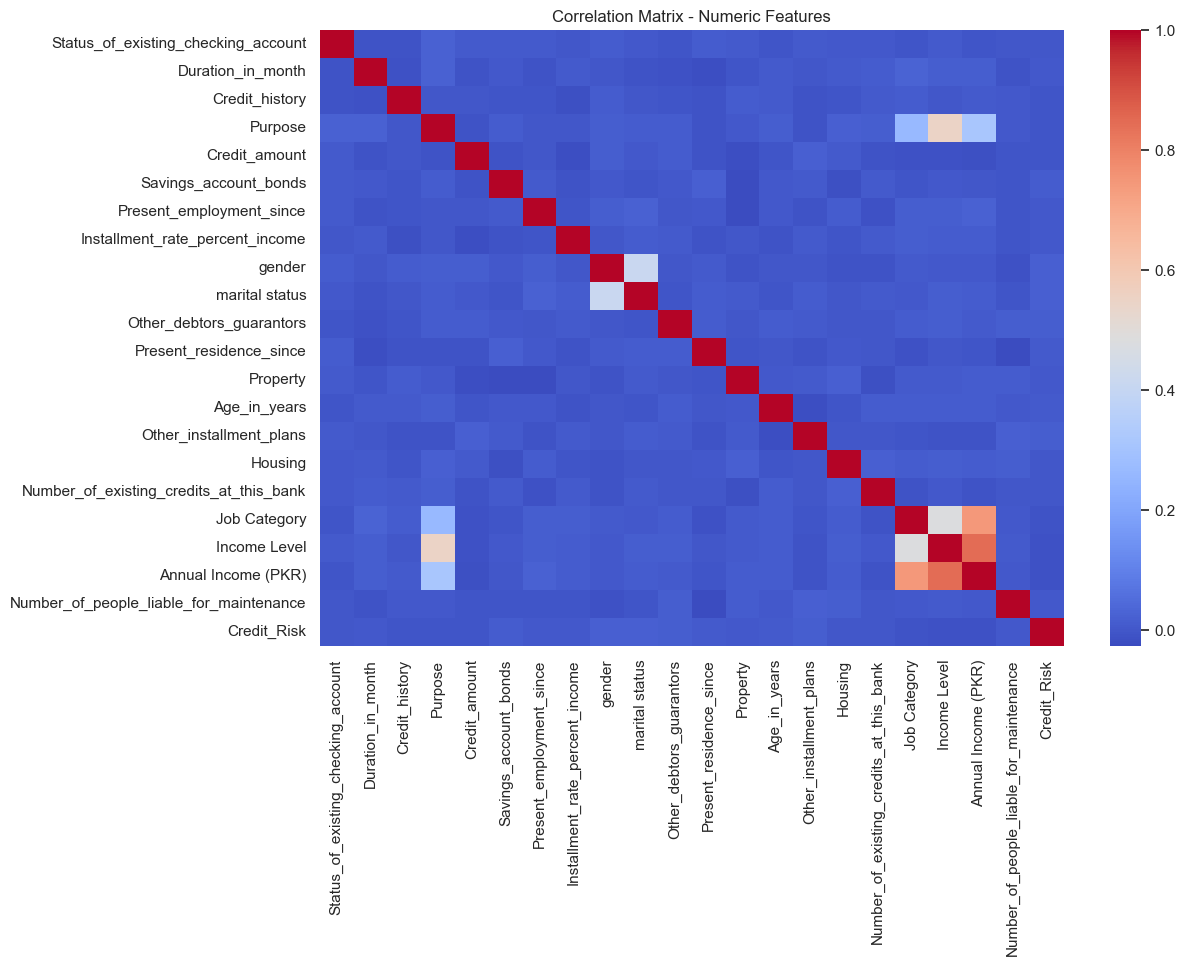

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix - Numeric Features")
plt.show()

# Distribution Of Numerical Columns

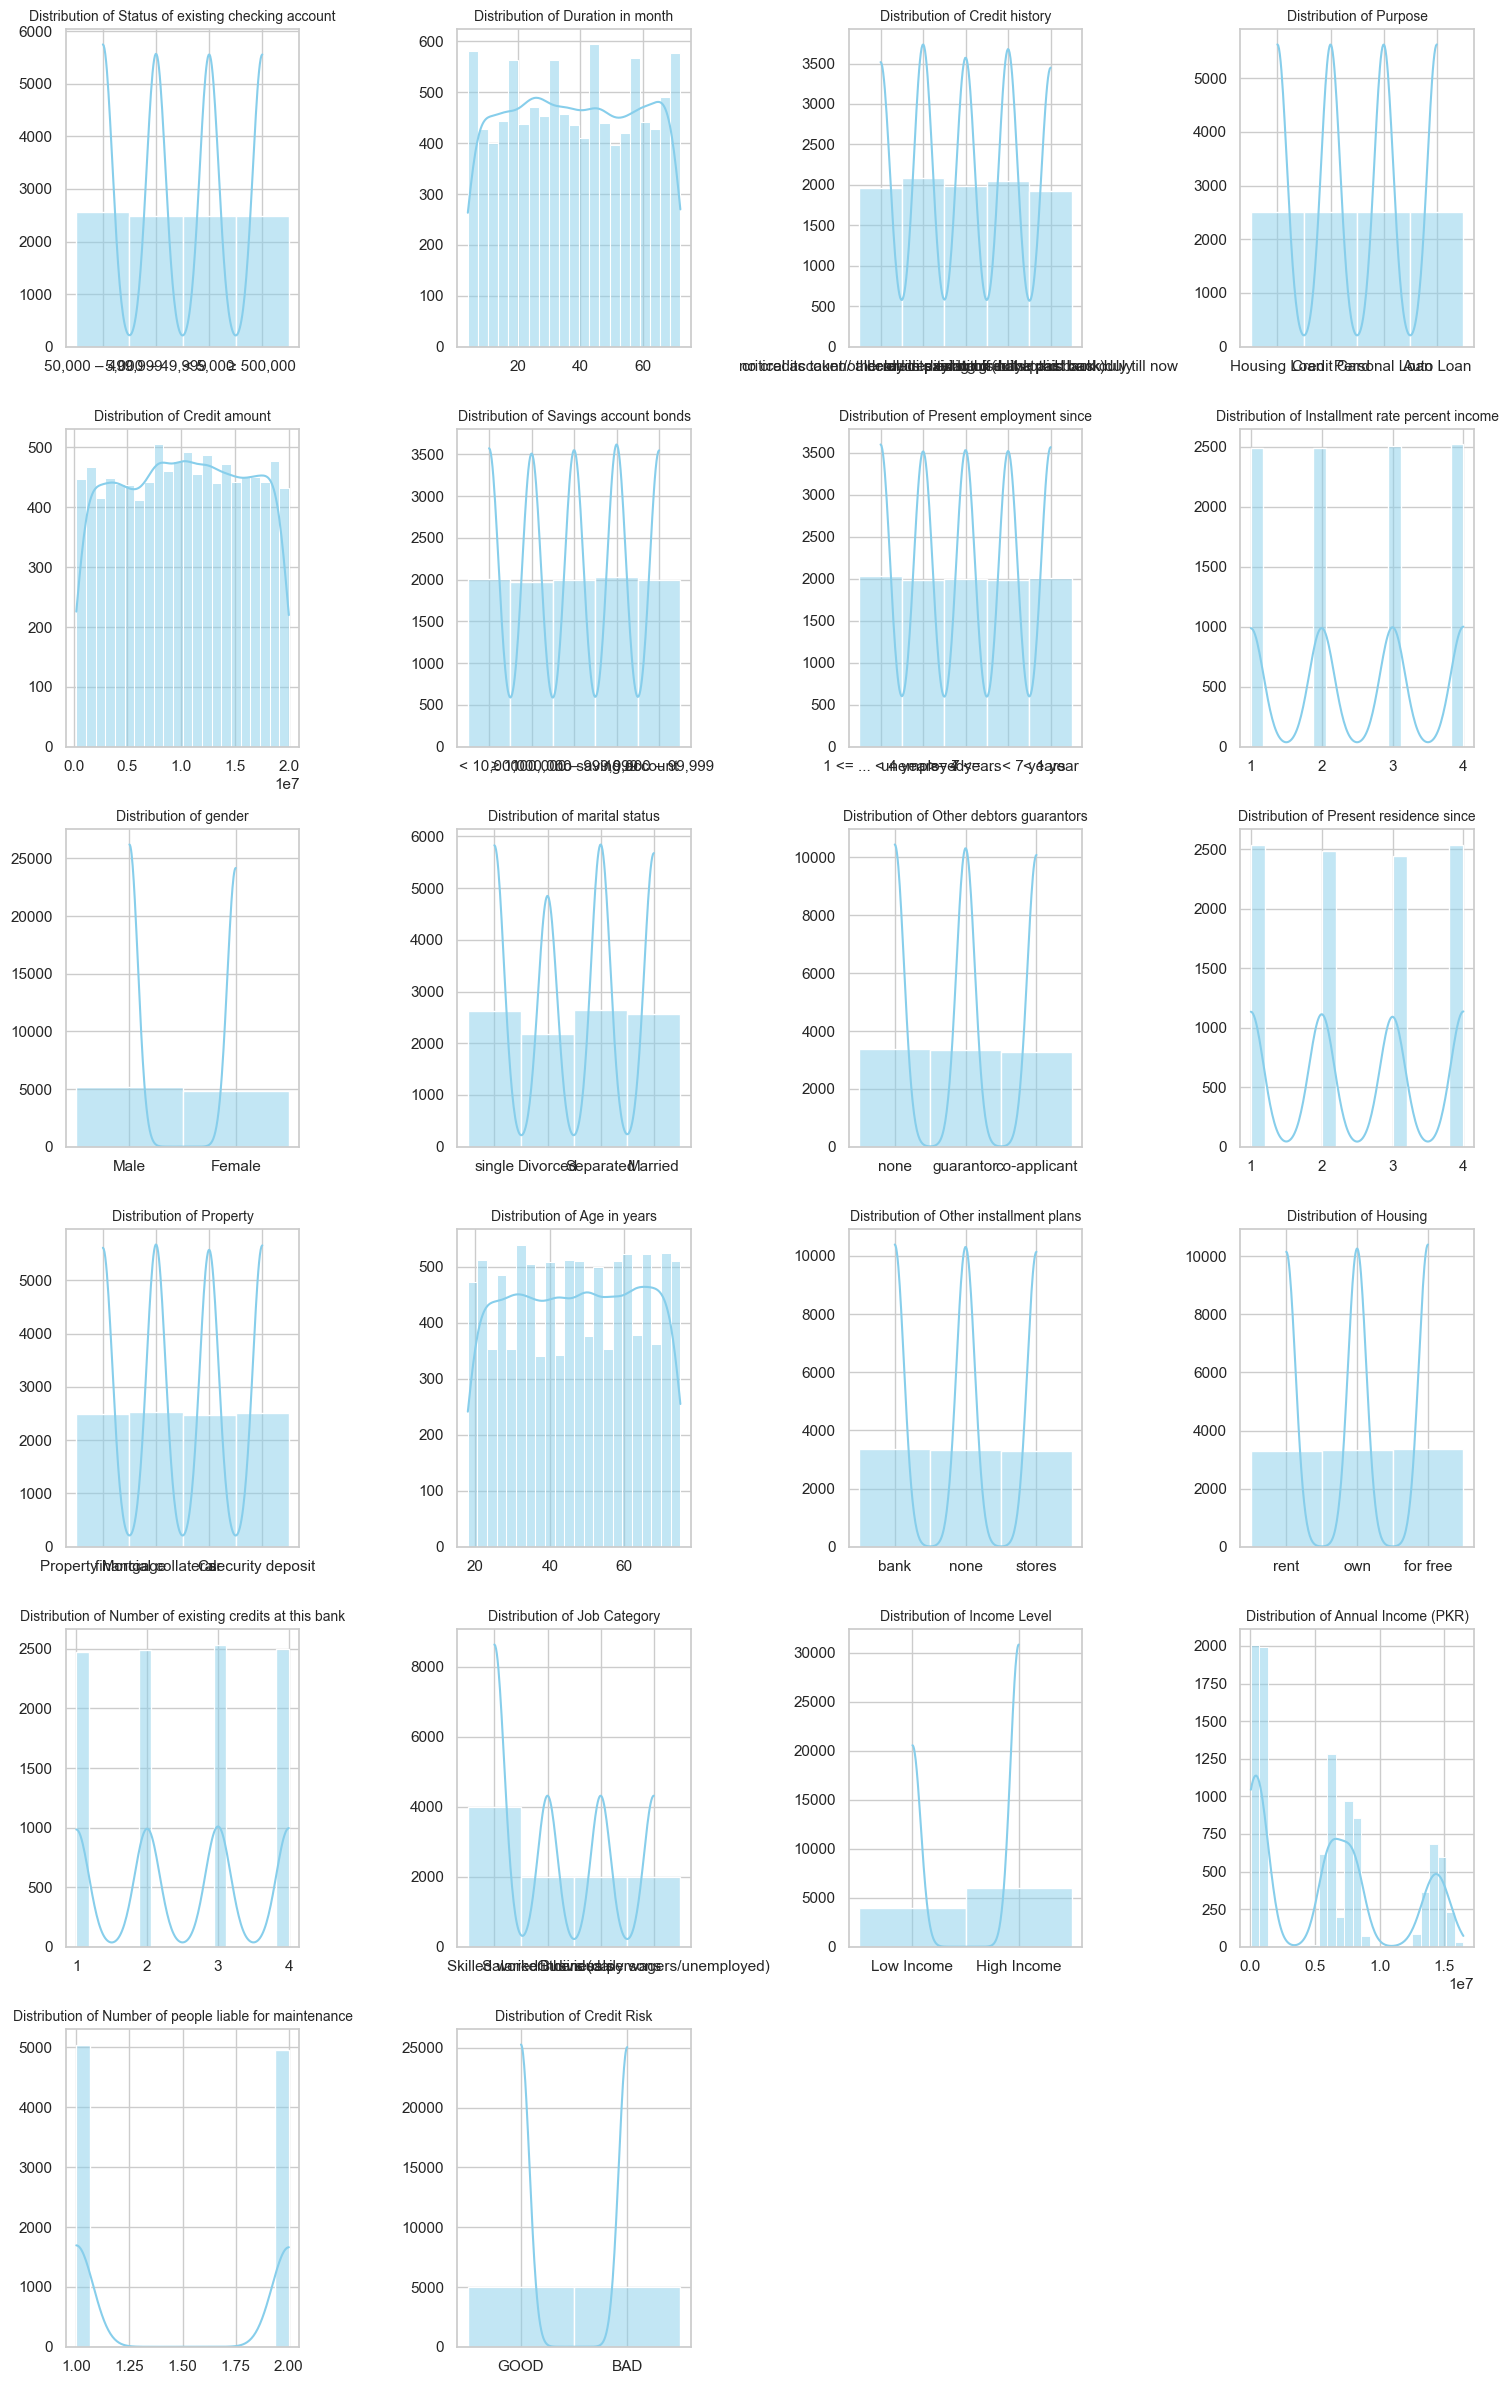

In [39]:
import math
num_features = df.select_dtypes(include=np.number).columns
num_features = [col for col in num_features if col in df.columns]

n_col = 4
n_row = math.ceil(len(num_features)/n_col)

fig, axes = plt.subplots(n_row, n_col, figsize=(15, n_row*4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(bank[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col.replace("_", " ")}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide empty subplots
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Relationship With Target Variable

In [42]:
target = "Credit_Risk"

# Box Plot For Continious Features

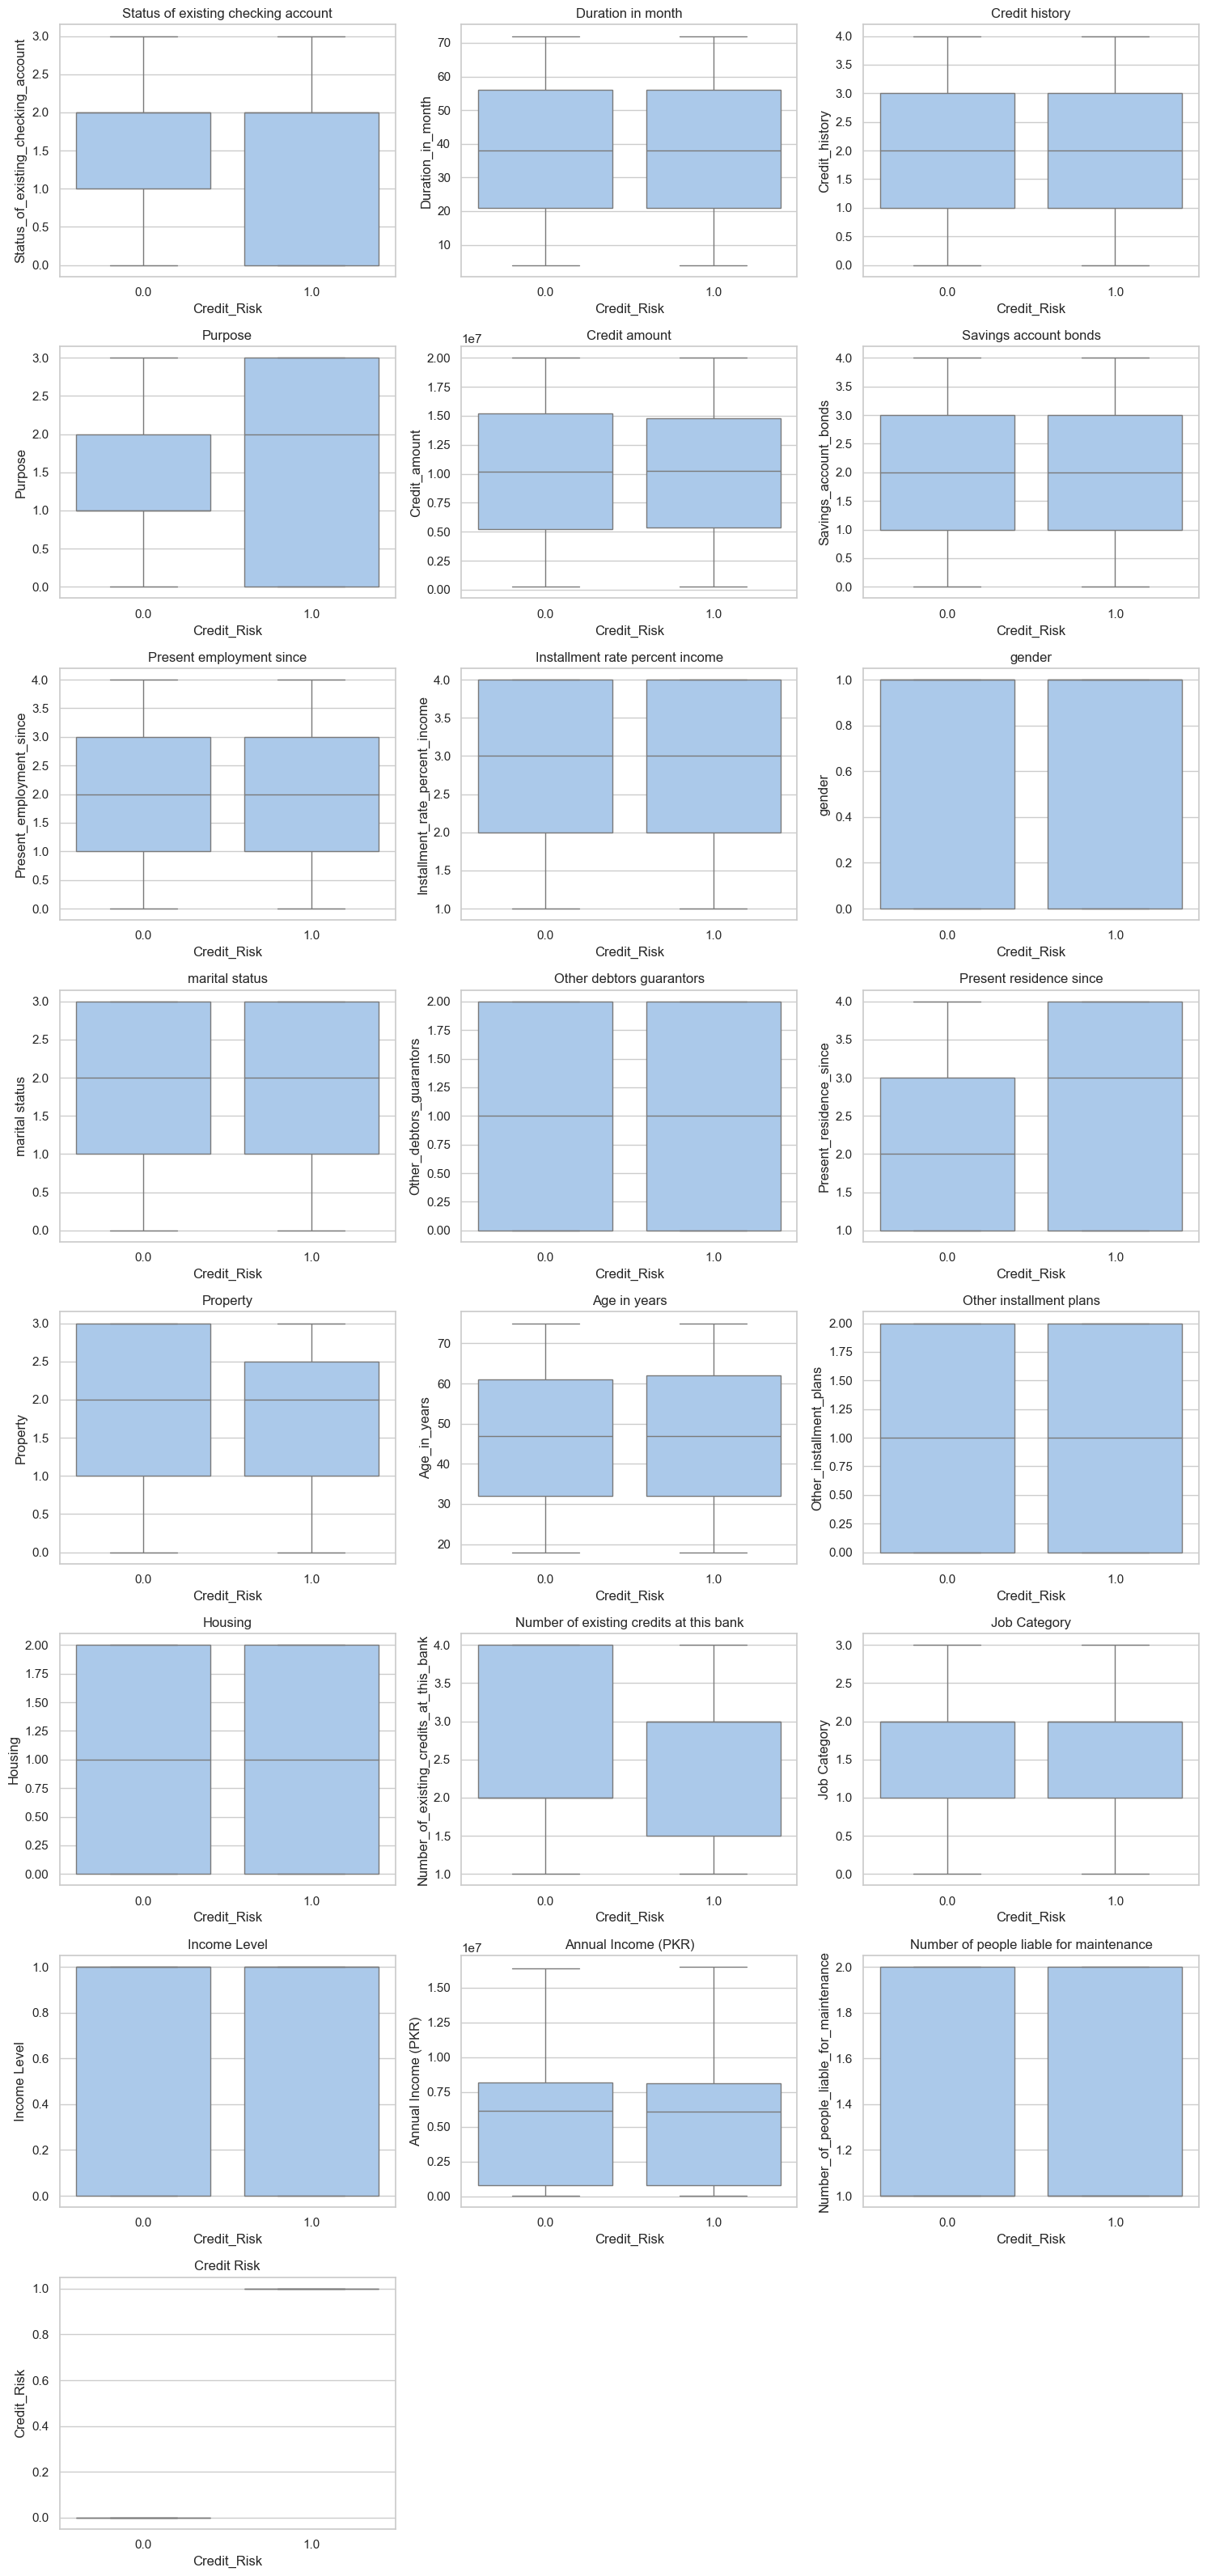

In [51]:
import math
num_features = [col for col in num_features if col in df.columns]

n_cols = 3
n_rows = math.ceil(len(num_features)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()


for i, col in enumerate(num_features):
        sns.boxplot(x=target, y=col, data=df, ax=axes[i], orient="v")
        axes[i].set_title(f"{col.replace("_", " ")}")

# Remove unused axes

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\atifs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


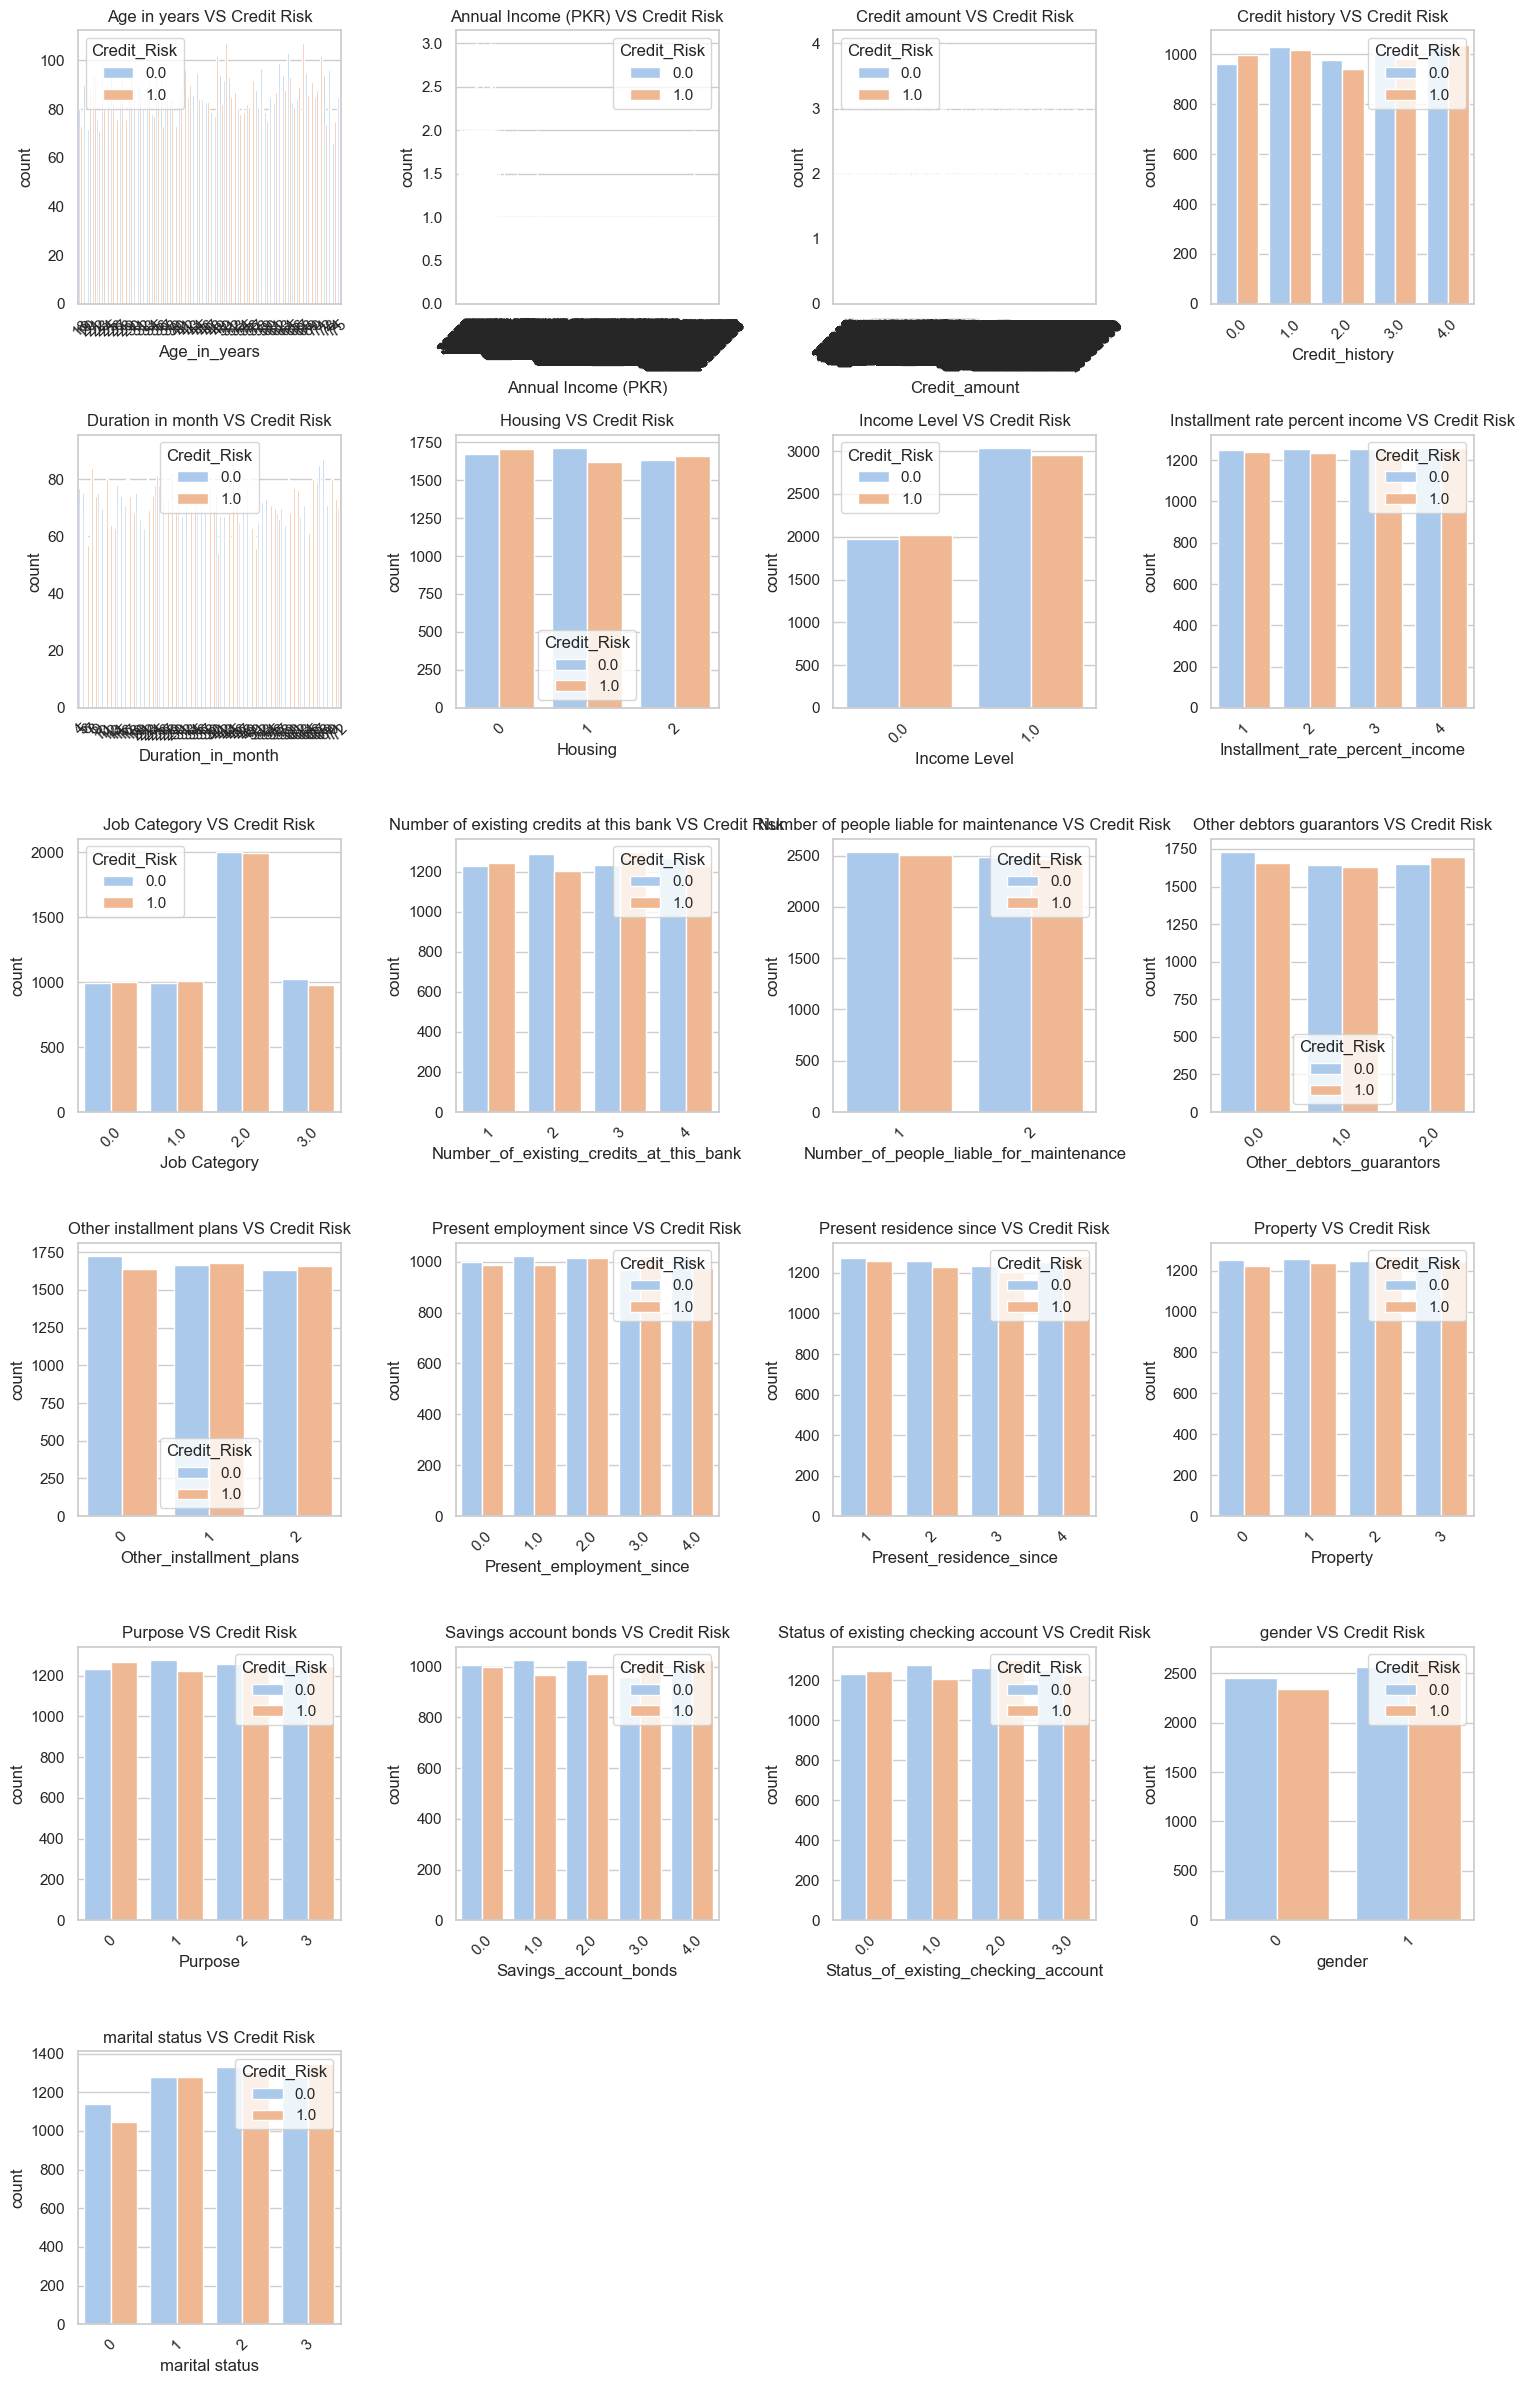

In [55]:
import math

# cat_features = df.select_dtypes(include="object").columns.difference(["Customer_ID", "Credit_Risk"])
# cat_features = [col for col in cat_features if col in bank.columns]

num_features = df.select_dtypes(include=np.number).columns.difference(["Credit_Risk"])
num_features = [col for col in num_features if col in df.columns]

n_cols = 4
n_rows = math.ceil(len(num_features)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()


for i, col in enumerate(num_features):
        sns.countplot(x=col, hue=target, data=df, ax=axes[i])
        axes[i].set_title(f"{col.replace("_", " ")} VS {target.replace("_", " ")}")
        axes[i].tick_params(axis="x", rotation=45)
        

# Remove unused axes

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

# Correlation with Credit Risk (if numeric encoding)

In [148]:
if df[target].dtype != "object":
    corr_target = corr[target].sort_values(ascending=False)
    print("Top correlations with Credit_Risk:\n", corr_target.head(30))
else:
    print("Credit_Risk is categorical — correlations will be handled via group means or encoding.")

Top correlations with Credit_Risk:
 Credit_Risk                                1.000000
marital status                             0.020200
gender                                     0.017985
Other_debtors_guarantors                   0.015215
Other_installment_plans                    0.013809
Savings_account_bonds                      0.011922
Present_residence_since                    0.005952
Age_in_years                               0.005514
Duration_in_month                          0.002968
Property                                   0.002622
Number_of_people_liable_for_maintenance    0.001961
Installment_rate_percent_income            0.001809
Present_employment_since                   0.001274
Status_of_existing_checking_account       -0.000794
Housing                                   -0.000899
Number_of_existing_credits_at_this_bank   -0.001051
Purpose                                   -0.003488
Credit_amount                             -0.005121
Credit_history              

# Derived Metrics
### Example: Average Spending-to-Income Ratio by Risk

In [71]:
if "Annual Income (PKR)" in df.columns:
    ratio_summary = df.groupby(target)['Annual Income (PKR)'].mean()
    print("\nAverage Annual Income (PKR) by Credit Risk:\n", ratio_summary)
else:
    print("Nothing!")


Average Annual Income (PKR) by Credit Risk:
 Credit_Risk
0.0    5.918384e+06
1.0    5.770781e+06
Name: Annual Income (PKR), dtype: float64


# Pairplot (key features)

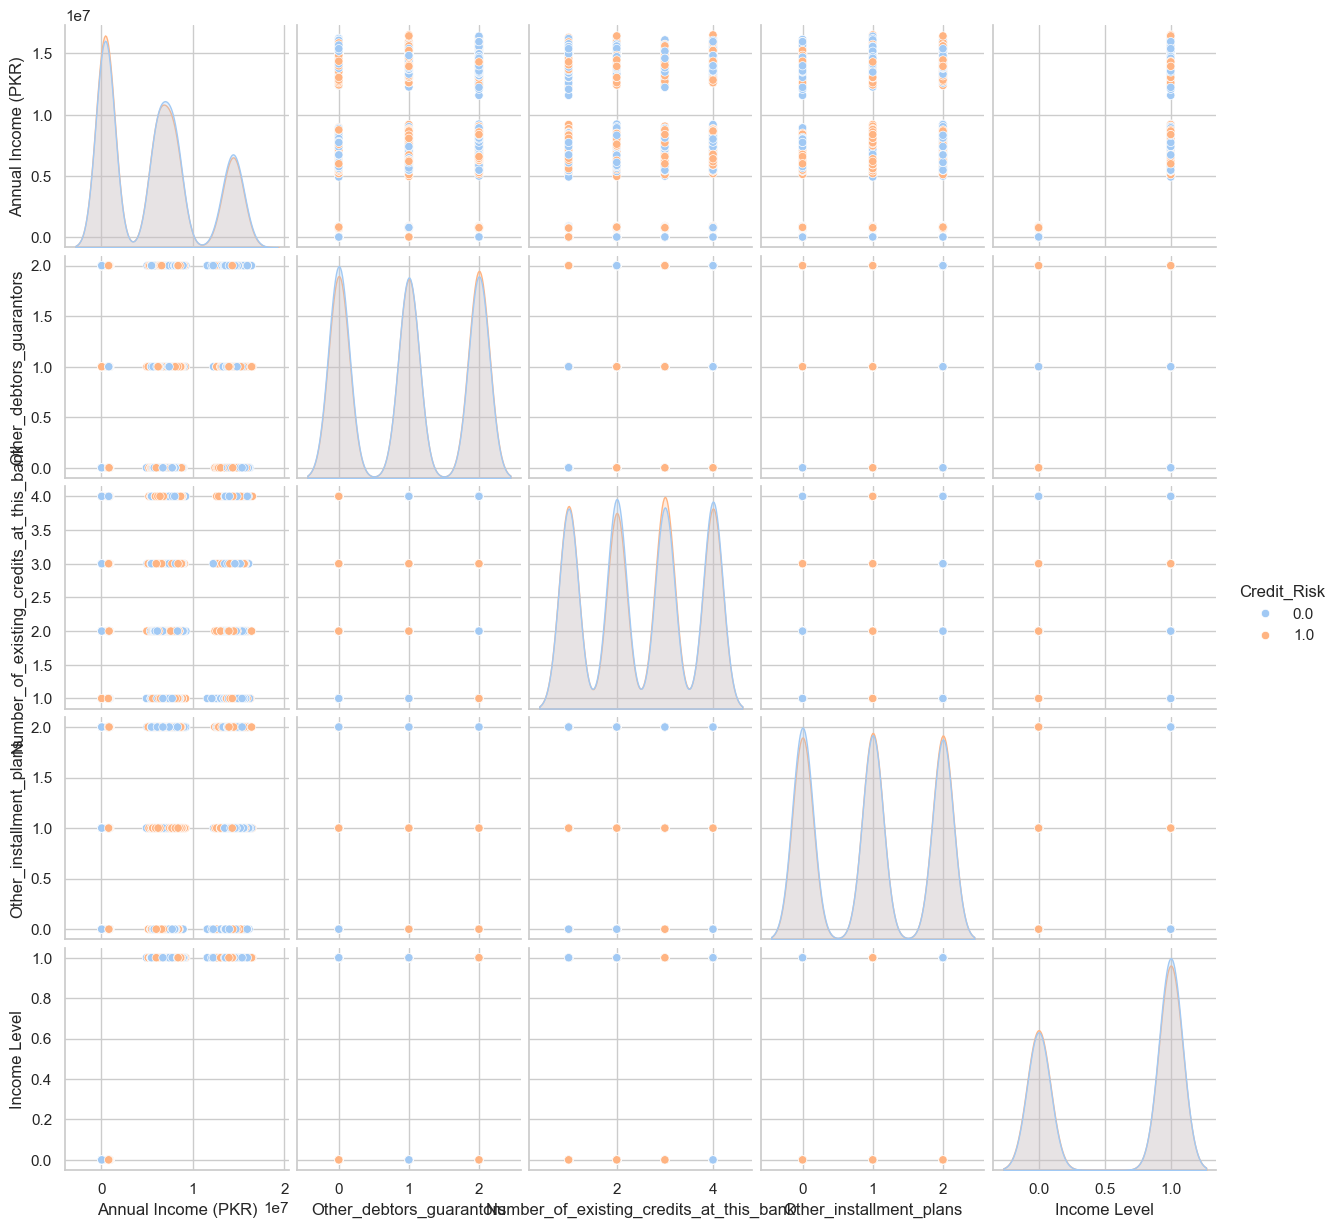

In [74]:
key_features = ['Annual Income (PKR)','Other_debtors_guarantors','Number_of_existing_credits_at_this_bank',
             'Other_installment_plans','Income Level',target]
existing = [f for f in key_features if f in df.columns]
sns.pairplot(df[existing], hue=target)
plt.show()

# Categorical Feature Insights

In [88]:
num_features = [col for col in num_features if col in df.columns]
print(f"\n--- {col} Crosstab ---")
display(pd.crosstab(df[col], df[target], normalize="index") * 100)


--- marital status Crosstab ---


Credit_Risk,0.0,1.0
marital status,,
0,52.036613,47.963387
1,49.902229,50.097771
2,50.474744,49.525256
3,48.723810,51.276190


In [82]:
print("\n✅ EDA Completed Successfully!")


✅ EDA Completed Successfully!


In [90]:
# df['Status_of_existing_checking_account'].unique()

In [92]:
# shorter version
# mapping_Status_of_existing_checking_account = {
#     "< 5,000": "A",
#     "5,000 – 49,999": "B",
#     "50,000 – 499,999": "C"
#    }

# df['Status_of_existing_checking_account'] = df['Status_of_existing_checking_account'].map(mapping_Status_of_existing_checking_account).fillna("D")

In [94]:
# df['Credit_history'].unique()

In [96]:
# mapping_Credit_history = {
#     "no credits taken/ all credits paid back duly": "A",
#     "all credits at this bank paid back duly": "B",
#     "existing credits paid back duly till now": "C",
#     "delay in paying off in the past" : "D"
#    }

# df['Credit_history'] = df['Credit_history'].map(mapping_Credit_history).fillna("E")

In [98]:
# df['Purpose'].unique()

In [100]:
# mapping_Purpose = {
#     "Housing Loan": "A",
#     "Credit Card": "B",
#     "Personal Loan": "C"
   
#    }

# df['Purpose'] = df['Purpose'].map(mapping_Purpose).fillna("D")

In [102]:
# df["Savings_account_bonds"].unique()

In [104]:
# mapping_Savings_account_bonds = {
#     "< 10,000": "A",
#     "10,000 – 99,999" : "B",
#     "100,000 – 999,999" : "C",
#     "≥ 1,000,000" : "D"
    
# }
# df["Savings_account_bonds"] = df["Savings_account_bonds"].map(mapping_Savings_account_bonds).fillna("E")

In [106]:
# df["Present_employment_since"].unique()

In [108]:
# mapping_Present_employment_since = {
#     "unemployed": "A",
#     "< 1 year" : "B",
#     "1 <= ... < 4 years" : "C",
#     "4 <= ... < 7 years" : "D"
    
# }
# df["Present_employment_since"] = df["Present_employment_since"].map(mapping_Present_employment_since).fillna("E")

In [110]:
# df["marital status"].unique()

In [112]:
# mapping_marital_status = {
#     "single": "A",
#     "Divorced" : "B",
#     "Separated" : "C"
    
# }
# df["marital status"] = df["marital status"].map(mapping_marital_status).fillna("D")

In [114]:
# df["Other_debtors_guarantors"].unique()

In [116]:
# mapping_Other_debtors_guarantors = {
#     "none": "A",
#     "co-applicant" : "B"
    
    
# }
# df["Other_debtors_guarantors"] = df["Other_debtors_guarantors"].map(mapping_Other_debtors_guarantors).fillna("C")

In [118]:
# df["Property"].unique()

In [120]:
# mapping_Property = {
#     "financial collateral": "A",
#     "Car" : "B",
#     "Property Mortgage" : "C"
    
    
# }
# df["Property"] = df["Property"].map(mapping_Property).fillna("D")

In [122]:
# df["Other_installment_plans"].unique()

In [124]:
# mapping_Other_installment_plans = {
#     "none": "A",
#     "bank" : "B"   
    
# }
# df["Other_installment_plans"] = df["Other_installment_plans"].map(mapping_Other_installment_plans).fillna("C")

In [126]:
# df["Housing"].unique()

In [128]:
# mapping_Housing = {
#     "for free": "A",
#     "own" : "B"   
    
# }
# df["Housing"] = df["Housing"].map(mapping_Housing).fillna("C")

In [130]:
# df["Job Category"].unique()

In [132]:
# mapping_Job_Category = {
#     "Others (daily wagers/unemployed)" : "A",
#     "Salaried individuals" : "B",
#     "Skilled worker" : "C"
# }

# df["Job Category"] = df["Job Category"].map(mapping_Job_Category).fillna("D")

In [134]:
# df["Income Level"].unique()

In [136]:
# mapping_Income_Level = {
#     "Low Income" : "A"
# }

# df["Income Level"] = df["Income Level"].map(mapping_Income_Level).fillna("B")

In [138]:
# bank["Credit_history"] = bank["Credit_history"].apply(replace_Values)

In [140]:
# bank.loc[fil, "Credit_history"] = "A"

In [142]:
# def replace_Values(value):
#     if value == "no credits taken/ all credits paid back duly":
#         return "A"
#     elif value == "all credits at this bank paid back duly":
#         return "B"

#     elif value == "existing credits paid back duly till now":
#         return "C"
    
#     elif value == "delay in paying off in the past":
#         return "D"

#     else: 
#         return "E"

In [144]:
# filtered = bank[bank["Credit_history"] == "no credits taken/ all credits paid back duly"]
# # fil = bank["Credit_history"] == "no credits taken/ all credits paid back duly"